## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `11_delta_dce_categories` 
### Recreating the delta dce categories from Susan's R notebook

created by Cassie Lumbrazo\
last updated: Oct 2024\
run location: locally\
python environment: **rasterio_scalebar**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

# import csv 
# import copy 
# import os.path 

import geopandas as gpd
# import rasterio
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# Paths for local machine
ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_all_variables.nc') 

In [4]:
ds

<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/337)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    slope                             (band, y, x) float32 ...
    aspect                            (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

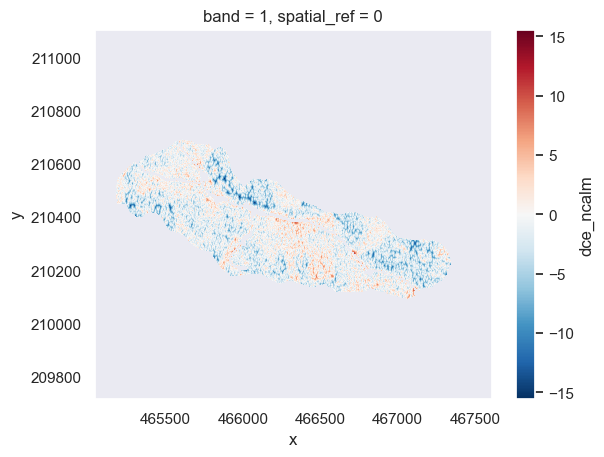

In [10]:
ds['dce_ncalm'].plot()

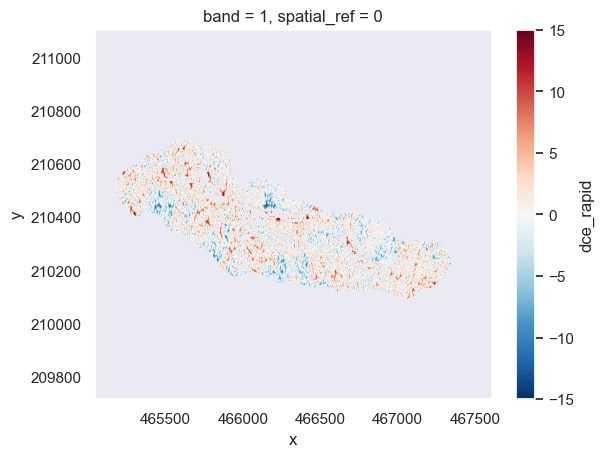

In [11]:
ds['dce_rapid'].plot()

# Create the 6 categories 
* Category 1: where the forest pixel from 2021 became denser forest 2023 
* Category 2: where the forest pixel from 2021 turned into a forest edge in 2023 
* Category 3: where there was no change to the pixel classification 
* Category 4: where the open pixel from 2021 became less open in 2023 
* Category 5: where the open pixel from 2021 became more open in 2023 
* Category 6: where the forest pixel from 2021 became an open pixel in 2023

Otherwise known as, 

1: forest to denser forest

2: forest to edge

3: no change

4: open to less open

5: open to more open

6: forest to open


In [12]:
# Calculate delta DCE
delta_dce = ds['dce_rapid'] - ds['dce_ncalm']

# Create a new variable to store the categories
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce > 0), 1, 0)
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] >= 0), 6, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] >= 0) & (delta_dce < 0), 4, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] >= 0) & (delta_dce > 0), 5, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce < 0), 2, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where(np.abs(delta_dce) < 0.5, 3, ds['delta_dce_cat'])

This version below matches the Rcode conditional statements exactly...

In [ ]:
# Calculate delta DCE
delta_dce = ds['dce_rapid'] - ds['dce_ncalm']

# Create a new variable to store the categories
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce > 0), 2, 0)
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] > 0), 6, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] < ds['dce_ncalm']), 4, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] > ds['dce_ncalm']), 5, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce < 0), 1, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where(np.abs(delta_dce) < 0.5, 3, ds['delta_dce_cat'])

# Commented version below....
# Calculate delta DCE
delta_dce = ds['dce_rapid'] - ds['dce_ncalm']

# Create a new variable to store the categories
# Category 2: NCalm negative, Rapid negative, delta DCE positive
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce > 0), 2, 0)

# Category 6: NCalm negative, Rapid positive
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] > 0), 6, ds['delta_dce_cat'])

# Category 4: NCalm positive, Rapid less than NCalm
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] < ds['dce_ncalm']), 4, ds['delta_dce_cat'])

# Category 5: NCalm positive, Rapid greater than NCalm
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] > ds['dce_ncalm']), 5, ds['delta_dce_cat'])

# Category 1: NCalm negative, Rapid negative, delta DCE negative
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce < 0), 1, ds['delta_dce_cat'])

# Category 3: delta DCE close to zero (absolute value less than 0.5)
ds['delta_dce_cat'] = xr.where(np.abs(delta_dce) < 0.5, 3, ds['delta_dce_cat'])

And this version matches the Rcode exactly... because the categories were in a different order 

In [24]:
# Calculate delta DCE
delta_dce = ds['dce_rapid'] - ds['dce_ncalm']

# Create a new variable to store the categories
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] > 0), 6, 0)
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce > 0), 2, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] < ds['dce_ncalm']), 4, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] > ds['dce_ncalm']), 5, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce < 0), 1, ds['delta_dce_cat'])
ds['delta_dce_cat'] = xr.where(np.abs(delta_dce) < 0.5, 3, ds['delta_dce_cat'])

# Commented version below....
# Calculate delta DCE
delta_dce = ds['dce_rapid'] - ds['dce_ncalm']

# Create a new variable to store the categories
# Category 6: NCalm negative, Rapid positive
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] > 0), 6, 0)

# Category 2: NCalm negative, Rapid negative, delta DCE positive
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce > 0), 2, ds['delta_dce_cat'])

# Category 4: NCalm positive, Rapid less than NCalm
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] < ds['dce_ncalm']), 4, ds['delta_dce_cat'])

# Category 5: NCalm positive, Rapid greater than NCalm
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] > ds['dce_ncalm']), 5, ds['delta_dce_cat'])

# Category 1: NCalm negative, Rapid negative, delta DCE negative
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce < 0), 1, ds['delta_dce_cat'])

# Category 3: delta DCE close to zero (absolute value less than 0.5)
ds['delta_dce_cat'] = xr.where(np.abs(delta_dce) < 0.5, 3, ds['delta_dce_cat'])

Fixing the ordering of that code to make more sense... 

Ordering:

1. Category 1: Most_Forested (NCalm negative, Rapid negative, delta DCE negative)
2. Category 2: More_Forested (NCalm negative, Rapid negative, delta DCE positive)
3. Category 3: No_Change (delta DCE close to zero)
4. Category 4: Less_Open (NCalm positive, Rapid less than NCalm)
5. Category 5: More_Open (NCalm positive, Rapid greater than NCalm)
6. Category 6: Most_Open (NCalm negative, Rapid positive)


In [25]:
# Calculate delta DCE
delta_dce = ds['dce_rapid'] - ds['dce_ncalm']

# Create a new variable to store the categories
# Category 1: Most Forested (ncalm negative, rapid negative, delta DCE negative) forest to denser forest 
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce < 0), 1, 0)

# Category 2: More Forested (ncalm negative, rapid negative, delta DCE positive) forest to edge 
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] < 0) & (delta_dce > 0), 2, ds['delta_dce_cat'])

# Category 3: No Change (delta DCE close to zero (absolute value less than 0.5)) no change 
ds['delta_dce_cat'] = xr.where(np.abs(delta_dce) < 0.5, 3, ds['delta_dce_cat'])

# Category 4: More Open (ncalm positive, rapid less than ncalm) 
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] < ds['dce_ncalm']), 4, ds['delta_dce_cat'])

# Category 5: ncalm positive, rapid greater than ncalm
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] > 0) & (ds['dce_rapid'] > ds['dce_ncalm']), 5, ds['delta_dce_cat'])

# Category 6: ncalm negative, rapid positive
ds['delta_dce_cat'] = xr.where((ds['dce_ncalm'] < 0) & (ds['dce_rapid'] > 0), 6, ds['delta_dce_cat'])

Now, we have our delta_dce categories but we also need to do the following, 

"The snow depth values for both years for the delta DCE category 3 (no change) were used to compute mean values of 0.37 and 0.40 m for 2021 and 2023, respectively, and standard deviations of 0.32 and 0.22. These values were used to normalize snow depth for all pixels in each year as the number of standard deviations away from the mean value."

In [26]:
# Calculate mean and standard deviation of snow depth for delta DCE category 3 (no change)
mean_2021 = ds['hs_ncalm'].where(ds['delta_dce_cat'] == 3).mean()
std_2021 = ds['hs_ncalm'].where(ds['delta_dce_cat'] == 3).std()

mean_2023 = ds['hs_rapid'].where(ds['delta_dce_cat'] == 3).mean()
std_2023 = ds['hs_rapid'].where(ds['delta_dce_cat'] == 3).std()

# Normalize snow depth for each year
ds['hs_ncalm_normalized'] = (ds['hs_ncalm'] - mean_2021) / std_2021
ds['hs_rapid_normalized'] = (ds['hs_rapid'] - mean_2023) / std_2023

# Calculate the difference in normalized snow depth 
ds['hs_diff_normalized'] = ds['hs_rapid_normalized'] - ds['hs_ncalm_normalized']

In [27]:
# normalized ncalm snow depth by delta DCE category
ds['hs_ncalm_normalized_delta_dce_cat_1'] = ds['hs_ncalm_normalized'].where(ds['delta_dce_cat'] == 1)
ds['hs_ncalm_normalized_delta_dce_cat_2'] = ds['hs_ncalm_normalized'].where(ds['delta_dce_cat'] == 2)
ds['hs_ncalm_normalized_delta_dce_cat_3'] = ds['hs_ncalm_normalized'].where(ds['delta_dce_cat'] == 3)
ds['hs_ncalm_normalized_delta_dce_cat_4'] = ds['hs_ncalm_normalized'].where(ds['delta_dce_cat'] == 4)
ds['hs_ncalm_normalized_delta_dce_cat_5'] = ds['hs_ncalm_normalized'].where(ds['delta_dce_cat'] == 5)
ds['hs_ncalm_normalized_delta_dce_cat_6'] = ds['hs_ncalm_normalized'].where(ds['delta_dce_cat'] == 6)

# normalized rapid snow depth by delta DCE category
ds['hs_rapid_normalized_delta_dce_cat_1'] = ds['hs_rapid_normalized'].where(ds['delta_dce_cat'] == 1)
ds['hs_rapid_normalized_delta_dce_cat_2'] = ds['hs_rapid_normalized'].where(ds['delta_dce_cat'] == 2)
ds['hs_rapid_normalized_delta_dce_cat_3'] = ds['hs_rapid_normalized'].where(ds['delta_dce_cat'] == 3)
ds['hs_rapid_normalized_delta_dce_cat_4'] = ds['hs_rapid_normalized'].where(ds['delta_dce_cat'] == 4)
ds['hs_rapid_normalized_delta_dce_cat_5'] = ds['hs_rapid_normalized'].where(ds['delta_dce_cat'] == 5)
ds['hs_rapid_normalized_delta_dce_cat_6'] = ds['hs_rapid_normalized'].where(ds['delta_dce_cat'] == 6)

Now, do the same for the difference in normalized snow depth between the two years, but also do it by aspect 

In [28]:
# difference in normalized snow depth by delta DCE category
ds['hs_diff_normalized_delta_dce_cat_1'] = ds['hs_diff_normalized'].where(ds['delta_dce_cat'] == 1)
ds['hs_diff_normalized_delta_dce_cat_2'] = ds['hs_diff_normalized'].where(ds['delta_dce_cat'] == 2)
ds['hs_diff_normalized_delta_dce_cat_3'] = ds['hs_diff_normalized'].where(ds['delta_dce_cat'] == 3)
ds['hs_diff_normalized_delta_dce_cat_4'] = ds['hs_diff_normalized'].where(ds['delta_dce_cat'] == 4)
ds['hs_diff_normalized_delta_dce_cat_5'] = ds['hs_diff_normalized'].where(ds['delta_dce_cat'] == 5)
ds['hs_diff_normalized_delta_dce_cat_6'] = ds['hs_diff_normalized'].where(ds['delta_dce_cat'] == 6)

# now, create a variable for the north and south sides of the ridge 
ds['hs_diff_normalized_delta_dce_cat_1_s'] = ds['hs_diff_normalized_delta_dce_cat_1'].where(ds['baf_ridge'] ==  1)
ds['hs_diff_normalized_delta_dce_cat_2_s'] = ds['hs_diff_normalized_delta_dce_cat_2'].where(ds['baf_ridge'] ==  1)
ds['hs_diff_normalized_delta_dce_cat_3_s'] = ds['hs_diff_normalized_delta_dce_cat_3'].where(ds['baf_ridge'] ==  1)
ds['hs_diff_normalized_delta_dce_cat_4_s'] = ds['hs_diff_normalized_delta_dce_cat_4'].where(ds['baf_ridge'] ==  1)
ds['hs_diff_normalized_delta_dce_cat_5_s'] = ds['hs_diff_normalized_delta_dce_cat_5'].where(ds['baf_ridge'] ==  1)
ds['hs_diff_normalized_delta_dce_cat_6_s'] = ds['hs_diff_normalized_delta_dce_cat_6'].where(ds['baf_ridge'] ==  1)

# now, create a variable for the north and south sides of the ridge 
ds['hs_diff_normalized_delta_dce_cat_1_n'] = ds['hs_diff_normalized_delta_dce_cat_1'].where(ds['baf_ridge'] == -1)
ds['hs_diff_normalized_delta_dce_cat_2_n'] = ds['hs_diff_normalized_delta_dce_cat_2'].where(ds['baf_ridge'] == -1)
ds['hs_diff_normalized_delta_dce_cat_3_n'] = ds['hs_diff_normalized_delta_dce_cat_3'].where(ds['baf_ridge'] == -1)
ds['hs_diff_normalized_delta_dce_cat_4_n'] = ds['hs_diff_normalized_delta_dce_cat_4'].where(ds['baf_ridge'] == -1)
ds['hs_diff_normalized_delta_dce_cat_5_n'] = ds['hs_diff_normalized_delta_dce_cat_5'].where(ds['baf_ridge'] == -1)
ds['hs_diff_normalized_delta_dce_cat_6_n'] = ds['hs_diff_normalized_delta_dce_cat_6'].where(ds['baf_ridge'] == -1)

Now, it's plot this and take a look as CDFs

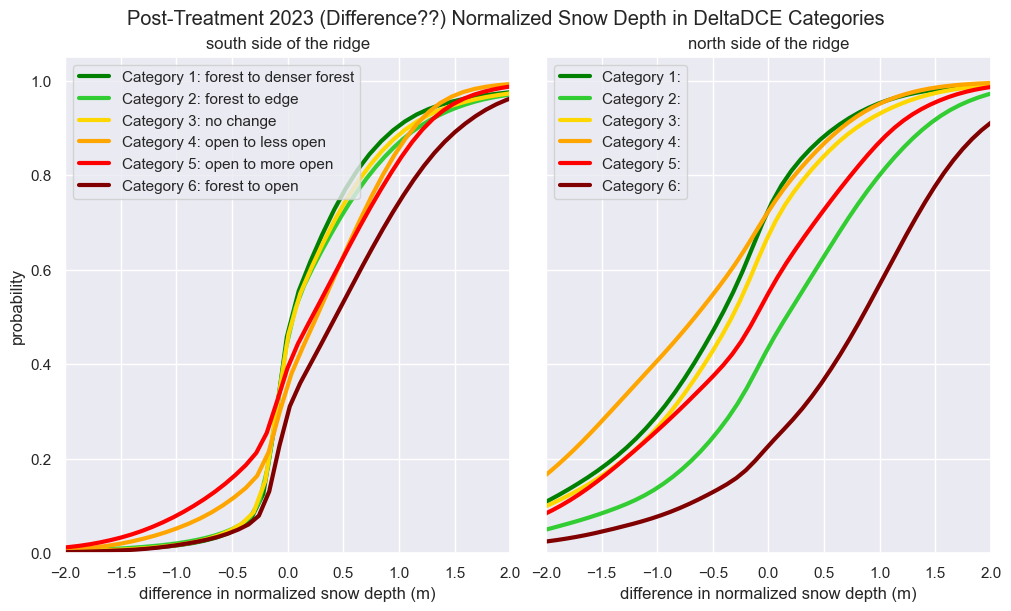

In [29]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,6), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_1_s'].values.flatten(), ax=axes[0], color='green',     label='Category 1: forest to denser forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_2_s'].values.flatten(), ax=axes[0], color='limegreen', label='Category 2: forest to edge', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_3_s'].values.flatten(), ax=axes[0], color='gold',      label='Category 3: no change', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_4_s'].values.flatten(), ax=axes[0], color='orange',    label='Category 4: open to less open', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_5_s'].values.flatten(), ax=axes[0], color='red',       label='Category 5: open to more open', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_6_s'].values.flatten(), ax=axes[0], color='maroon',    label='Category 6: forest to open', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_1_n'].values.flatten(), ax=axes[1], color='green',     label='Category 1:', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_2_n'].values.flatten(), ax=axes[1], color='limegreen', label='Category 2:', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_3_n'].values.flatten(), ax=axes[1], color='gold',      label='Category 3:', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_4_n'].values.flatten(), ax=axes[1], color='orange',    label='Category 4:', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_5_n'].values.flatten(), ax=axes[1], color='red',       label='Category 5:', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_6_n'].values.flatten(), ax=axes[1], color='maroon',    label='Category 6:', cumulative=True, linewidth=3)

# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('difference in normalized snow depth (m)')
axes[1].set_xlabel('difference in normalized snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-2,2)

plt.suptitle('Post-Treatment 2023 (Difference??) Normalized Snow Depth in DeltaDCE Categories')
axes[0].legend()
axes[1].legend()

plt.show()

The code below shows the n values... plotting above without them since they take extra time to create

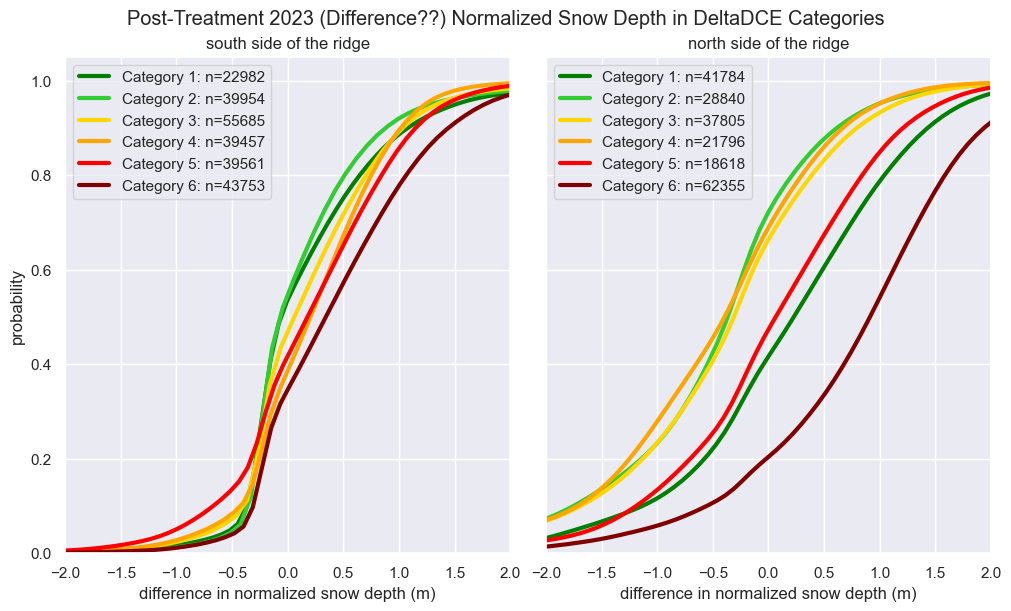

In [22]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,6), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_1_s'].values.flatten(), ax=axes[0], color='green',     label=f'Category 1: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_1_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_2_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'Category 2: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_2_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_3_s'].values.flatten(), ax=axes[0], color='gold',      label=f'Category 3: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_3_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_4_s'].values.flatten(), ax=axes[0], color='orange',    label=f'Category 4: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_4_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_5_s'].values.flatten(), ax=axes[0], color='red',    label=f'Category 5: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_5_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_6_s'].values.flatten(), ax=axes[0], color='maroon',     label=f'Category 6: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_6_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_1_n'].values.flatten(), ax=axes[1], color='green',     label=f'Category 1: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_1_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_2_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'Category 2: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_2_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_3_n'].values.flatten(), ax=axes[1], color='gold',      label=f'Category 3: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_3_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_4_n'].values.flatten(), ax=axes[1], color='orange',    label=f'Category 4: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_4_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_5_n'].values.flatten(), ax=axes[1], color='red',    label=f'Category 5: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_5_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_diff_normalized_delta_dce_cat_6_n'].values.flatten(), ax=axes[1], color='maroon',     label=f'Category 6: n={np.unique(ds["hs_diff_normalized_delta_dce_cat_6_n"]).size}', cumulative=True, linewidth=3)

# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('difference in normalized snow depth (m)')
axes[1].set_xlabel('difference in normalized snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-2,2)

plt.suptitle('Post-Treatment 2023 (Difference??) Normalized Snow Depth in DeltaDCE Categories')
axes[0].legend()
axes[1].legend()

plt.show()

The exact copy of Susan's code, but in python

AttributeError: 'DataArray' object has no attribute 'ravel'

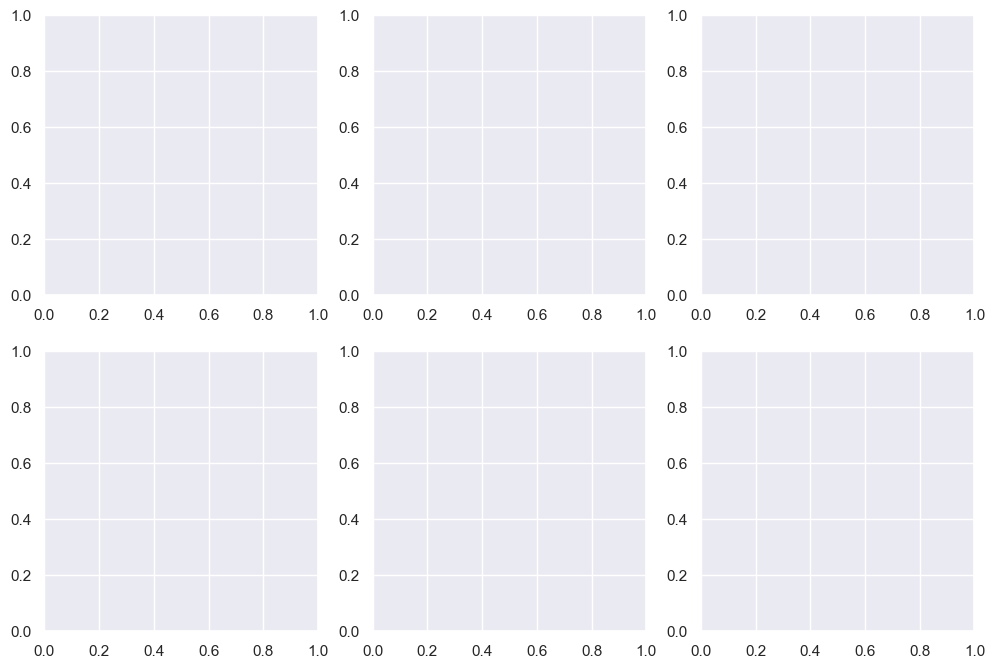

In [15]:
# Define the delta DCE categories
delta_dce_cat = np.full_like(delta_dce, np.nan)

# Was a forest (<0) and became open (>0), Delta_DCE = +
delta_dce_cat[(dce1 < 0) & (dce2 > 0)] = 6

# Was open (>0) and became more open (>>0), Delta_DCE = +
delta_dce_cat[(dce1 > 0) & (delta_dce > 0)] = 5

# Was open (>>0) and became less open (>0), Delta_DCE = -
delta_dce_cat[(dce1 > 0) & (delta_dce < 0)] = 4

# No change, Delta_DCE ~ 0
delta_dce_cat[np.abs(delta_dce) < 0.5] = 3

# Was a forest(<<0) and remained a forest but the edge got closer (<0), Delta_DCE = +
delta_dce_cat[(dce1 < 0) & (dce2 < 0) & (delta_dce > 0)] = 2

# Was a forest (<<0) and the edge got farther (<<<0), i.e., due to growth at the edge, Delta_DCE = -
delta_dce_cat[(dce1 < 0) & (dce2 < 0) & (delta_dce < 0)] = 1